In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

## Read in Crime Data

In [2]:
crimeData = pd.read_csv("crime_w_weather.csv")

/Users/Hong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
crimeData.head()

,Unnamed: 0,Dc_Dist,Psa,Dispatch_Date_Time,Dispatch_Date,Dispatch_Time,Hour,Dc_Key,Location_Block,UCR_General,...,Avg RH,Avg Wind Speed,Avg Wind Dir,Avg Press,Total Precip,Num Observations,Type,Wind_Category,Rain_Category,SEASON
0,0,35,D,2009-07-19 01:09:00,2009-07-19,01:09:00,1,200935061008,5500 BLOCK N 5TH ST,1500.0,...,47,7,248,1018.8,NaN,20,Non-Violent,Light Breeze,No rain,Summer
1,1,9,R,2009-06-25 00:14:00,2009-06-25,00:14:00,0,200909030511,1800 BLOCK WYLIE ST,2600.0,...,74,7,152,1009.0,NaN,23,Non-Violent,Light Breeze,No rain,Summer
2,2,17,1,2015-04-25 12:50:00,2015-04-25,12:50:00,12,201517017705,800 BLOCK S BROAD ST,600.0,...,39,9,235,1011.2,NaN,24,Violent,Gentle Breeze,No rain,Spring
3,3,23,K,2009-02-10 14:33:00,2009-02-10,14:33:00,14,200923006310,2200 BLOCK RIDGE AVE,800.0,...,67,3,186,1023.2,0.001,23,NaN,Light Air,Light rain,Winter
4,4,22,3,2015-10-06 18:18:00,2015-10-06,18:18:00,18,201522089374,1500 BLOCK N 15TH ST,600.0,...,60,5,267,1017.0,NaN,24,Violent,Light Breeze,No rain,Fall


In [4]:
crimeData.columns

Index(['Unnamed: 0', 'Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Text_General_Code', 'Police_Districts', 'Month', 'Lon', 'Lat',
       'events', 'year', 'Date', 'High Temp.', 'Low Temp.', 'Avg Temp.',
       'Temp Departure', 'HDD', 'CDD', 'GDD', 'Avg Dewpoint', 'Avg RH',
       'Avg Wind Speed', 'Avg Wind Dir', 'Avg Press', 'Total Precip',
       'Num Observations', 'Type', 'Wind_Category', 'Rain_Category', 'SEASON'],
      dtype='object')

In [12]:
crimeData[["Lat", "Lon", "Police_Districts"]]

,Lat,Lon,Police_Districts
0,40.036389,-75.130477,20.0
1,39.969532,-75.166350,8.0
2,39.940070,-75.166412,13.0
3,39.979586,-75.171149,16.0
4,39.976134,-75.160229,16.0
...,...,...,...
2217016,39.923556,-75.169992,1.0
2217017,39.964593,-75.197627,12.0
2217018,39.964593,-75.197627,12.0
2217019,39.970507,-75.240163,15.0


In [10]:
crimeData.Police_Districts.value_counts().sort_index()

1.0      47949
2.0     116062
3.0     114594
4.0      31113
5.0      95821
6.0      44444
7.0      73204
8.0      83353
9.0     132870
10.0    120480
11.0    183167
12.0     72198
13.0     74514
14.0    109907
15.0    135597
16.0    153101
17.0    161232
18.0    150180
19.0     87171
20.0    130292
21.0     96954
22.0      2818
Name: Police_Districts, dtype: int64

In [23]:
police_Districts_max = crimeData.groupby(by = ['Police_Districts'])[["Lat", "Lon"]].max()
police_Districts_min = crimeData.groupby(by = ['Police_Districts'])[["Lat", "Lon"]].min()

police_Districts_key = pd.merge(police_Districts_min, police_Districts_max, on=police_Districts_min.index, how='inner')
police_Districts_key = police_Districts_key.rename(columns={"key_0": "District", "Lat_x": "Lat_min", "Lon_x": "Lon_min",
                                                          "Lat_y": "Lat_max", "Lon_y": "Lon_max"})

In [24]:
police_Districts_key

,District,Lat_min,Lon_min,Lat_max,Lon_max
0,1.0,39.887168,-75.205988,39.932646,-75.145872
1,2.0,40.026602,-75.113085,40.078620,-75.046990
2,3.0,39.897020,-75.175470,39.944666,-75.137213
3,4.0,40.014899,-75.263454,40.083640,-75.196981
4,5.0,39.941978,-75.165172,39.970203,-75.135757
5,6.0,40.056876,-75.086660,40.137895,-74.984777
6,7.0,40.031242,-75.046330,40.117527,-74.957504
7,8.0,39.944674,-75.192081,39.975488,-75.159705
8,9.0,39.875382,-75.256515,39.948170,-75.201989
9,10.0,40.023935,-75.232122,40.092898,-75.140840


## Read in Crash Data

In [25]:
import glob, os
os.chdir("/Users/Hong/Desktop/GitHub/Crime-in-Philadelphia/Winter 20-21/Crash Data")
for file in glob.glob("*.csv"):
    print(file)

CRASH_2010_PHILADELPHIA.csv
CRASH_2014_PHILADELPHIA.csv
CRASH_2005_PHILADELPHIA.csv
CRASH_2011_PHILADELPHIA.csv
CRASH_2015_PHILADELPHIA.csv
CRASH_2012_PHILADELPHIA.csv
CRASH_2006_PHILADELPHIA.csv
CRASH_2009_PHILADELPHIA.csv
CRASH_2016_PHILADELPHIA.csv
CRASH_2013_PHILADELPHIA.csv
CRASH_2007_PHILADELPHIA.csv
CRASH_2008_PHILADELPHIA.csv


In [26]:
#combine all files in the list
crashData = pd.concat([pd.read_csv(f) for f in glob.glob("*.csv")])

/Users/Hong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (86,87) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/Hong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (86,87,90,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/Hong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (91) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [27]:
crashData.head()

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_FLAGGER,WZ_LAW_OFFCR_IND,WZ_LN_CLOSURE,WZ_MOVING,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,YEAR_COUNTY
0,2229.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2010-67
1,658.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2010-67
2,1217.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2010-67
3,648.0,1,0,0,0,0,0,0,0,0,...,NaN,N,Y,NaN,NaN,NaN,NaN,3,NaN,2010-67
4,36.0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,2010-67


In [28]:
crashData.shape

(135635, 97)

In [29]:
columns = ['ARRIVAL_TM', 'CRN', 'COUNTY','LATITUDE', 'LONGITUDE',
           'DRIVER_COUNT_16YR', 'DRIVER_COUNT_17YR', 'DRIVER_COUNT_18YR',
           'DRIVER_COUNT_19YR', 'DRIVER_COUNT_20YR', 'DRIVER_COUNT_50_64YR',
           'DRIVER_COUNT_65_74YR', 'DRIVER_COUNT_75PLUS', 'EST_HRS_CLOSED',
           'HEAVY_TRUCK_COUNT','HORSE_BUGGY_COUNT','ILLUMINATION',
           'INTERSECT_TYPE','LANE_CLOSED','LN_CLOSE_DIR','LOCATION_TYPE','NONMOTR_DEATH_COUNT',
           'NONMOTR_SUSP_SERIOUS_INJ_COUNT', 'NTFY_HIWY_MAINT', 'PED_COUNT',
           'PED_DEATH_COUNT', 'PED_SUSP_SERIOUS_INJ_COUNT', 'PERSON_COUNT',
           'POLICE_AGCY', 'POSSIBLE_INJ_COUNT', 'RDWY_SURF_TYPE_CD',
           'RELATION_TO_ROAD', 'ROAD_CONDITION', 'SCH_BUS_IND', 'SCH_ZONE_IND',
           'SMALL_TRUCK_COUNT', 'SPEC_JURIS_CD', 'SUSP_MINOR_INJ_COUNT',
           'SUSP_SERIOUS_INJ_COUNT', 'SUV_COUNT', 'TCD_FUNC_CD', 'TCD_TYPE',
           'TFC_DETOUR_IND', 'UNB_DEATH_COUNT', 'UNB_SUSP_SERIOUS_INJ_COUNT', 'UNBELTED_OCC_COUNT',
           'UNK_INJ_DEG_COUNT', 'UNK_INJ_PER_COUNT', 'URBAN_RURAL', 'VAN_COUNT',
           'VEHICLE_COUNT', 'WORK_ZONE_IND', 'WORK_ZONE_LOC', 'WORK_ZONE_TYPE',
           'WORKERS_PRES', 'WZ_CLOSE_DETOUR', 'WZ_FLAGGER', 'WZ_LAW_OFFCR_IND',
           'WZ_LN_CLOSURE', 'WZ_MOVING', 'WZ_OTHER', 'WZ_SHLDER_MDN',
           'WZ_LN_CLOSURE', 'WZ_MOVING', 'WZ_OTHER', 'WZ_SHLDER_MDN',
           'ROADWAY_CLEARED', 'YEAR_COUNTY', 'CONS_ZONE_SPD_LIM', 'WEATHER2']

crashData = crashData.drop(columns = columns)

crashData = crashData.drop(columns = ['BELTED_DEATH_COUNT',
       'BELTED_SUSP_SERIOUS_INJ_COUNT', 'BICYCLE_COUNT', 'BICYCLE_DEATH_COUNT',
       'BICYCLE_SUSP_SERIOUS_INJ_COUNT', 'BUS_COUNT', 'CHLDPAS_DEATH_COUNT',
       'CHLDPAS_SUSP_SERIOUS_INJ_COUNT'])

crashData = crashData.drop(columns = ['COMM_VEH_COUNT',
       'MCYCLE_DEATH_COUNT', 'MCYCLE_SUSP_SERIOUS_INJ_COUNT', 'MOTORCYCLE_COUNT',
       'MUNICIPALITY', 'NONMOTR_COUNT', 'DISTRICT'])



In [30]:
# Print number of missing values in each column
for c in crashData:
    value = crashData[c].isnull().sum()
    if (value>0):
        print("There are", value, " missing values in column",c)

There are 6585  missing values in column DEC_LAT
There are 6585  missing values in column DEC_LONG
There are 1357  missing values in column DISPATCH_TM
There are 10  missing values in column HOUR_OF_DAY
There are 10  missing values in column TIME_OF_DAY


In [31]:
crashData = crashData.dropna(subset=['DEC_LAT', 'DEC_LONG', 'DISPATCH_TM', 'HOUR_OF_DAY', 'TIME_OF_DAY'])

In [32]:
crashData.columns

Index(['AUTOMOBILE_COUNT', 'COLLISION_TYPE', 'CRASH_MONTH', 'CRASH_YEAR',
       'DAY_OF_WEEK', 'DEC_LAT', 'DEC_LONG', 'DISPATCH_TM', 'FATAL_COUNT',
       'HOUR_OF_DAY', 'INJURY_COUNT', 'MAX_SEVERITY_LEVEL', 'TIME_OF_DAY',
       'TOT_INJ_COUNT', 'TOTAL_UNITS', 'WEATHER1'],
      dtype='object')

In [34]:
crashData.shape

(127877, 16)

In [35]:
police_Districts_key

,District,Lat_min,Lon_min,Lat_max,Lon_max
0,1.0,39.887168,-75.205988,39.932646,-75.145872
1,2.0,40.026602,-75.113085,40.078620,-75.046990
2,3.0,39.897020,-75.175470,39.944666,-75.137213
3,4.0,40.014899,-75.263454,40.083640,-75.196981
4,5.0,39.941978,-75.165172,39.970203,-75.135757
5,6.0,40.056876,-75.086660,40.137895,-74.984777
6,7.0,40.031242,-75.046330,40.117527,-74.957504
7,8.0,39.944674,-75.192081,39.975488,-75.159705
8,9.0,39.875382,-75.256515,39.948170,-75.201989
9,10.0,40.023935,-75.232122,40.092898,-75.140840


In [40]:
for index, c in crashData[0:5].iterrows():
    print(c['DEC_LAT'], c['DEC_LONG'])
    

39.9951 -75.2397
39.9423 -75.1433
39.959 -75.1575
39.9822 -75.2075
39.9995 -75.0846


In [45]:
for index, pdk in police_Districts_key.iterrows():    
    a = pdk['Lat_min']
    b = pdk['Lat_max']
    c = pdk['Lon_min']
    d = pdk['Lon_max']
    e = pdk['District']
    
    crashData.loc[(crashData['DEC_LAT'] <= b) & (crashData['DEC_LAT'] >= a) & (crashData['DEC_LONG'] <= d) & (crashData['DEC_LONG'] >= c), 'DISTRICT'] = e


In [56]:
sum(crashData.DISTRICT.isna())

356

In [57]:
crashData = crashData.dropna(subset=['DISTRICT'])

In [58]:
crashData['events'] = 1

[Text(0, 0.5, 'Number of Accidents'), Text(0.5, 0, 'Month')]

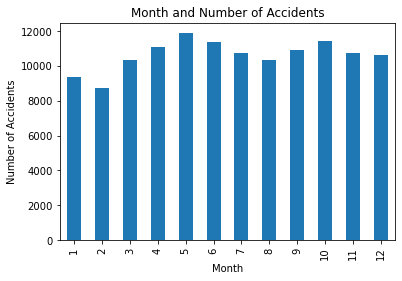

In [61]:
ax = crashData['CRASH_MONTH'].value_counts().sort_index().plot.bar(title="Month and Number of Accidents")
ax.set(xlabel='Month', ylabel='Number of Accidents')

[Text(0, 0.5, 'Number of Accidents'), Text(0.5, 0, 'Day Of the Week')]

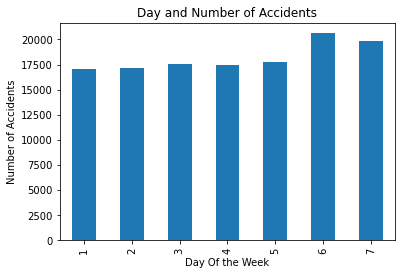

In [62]:
ax = crashData['DAY_OF_WEEK'].value_counts().sort_index().plot.bar(title="Day and Number of Accidents")
ax.set(xlabel='Day Of the Week', ylabel='Number of Accidents')

In [63]:
groupLonLat = crashData.groupby(['DEC_LONG', 'DEC_LAT']).sum().sort_values("events", ascending = False).reset_index()
groupLonLat = groupLonLat[['DEC_LONG', 'DEC_LAT', 'events']]
groupLonLat.head(5)

,DEC_LONG,DEC_LAT,events
0,-75.2401,39.9040,139
1,-75.0688,40.0086,133
2,-75.1641,39.9579,119
3,-75.0286,40.0808,110
4,-75.2367,39.8946,102


(-74.9, -75.3)

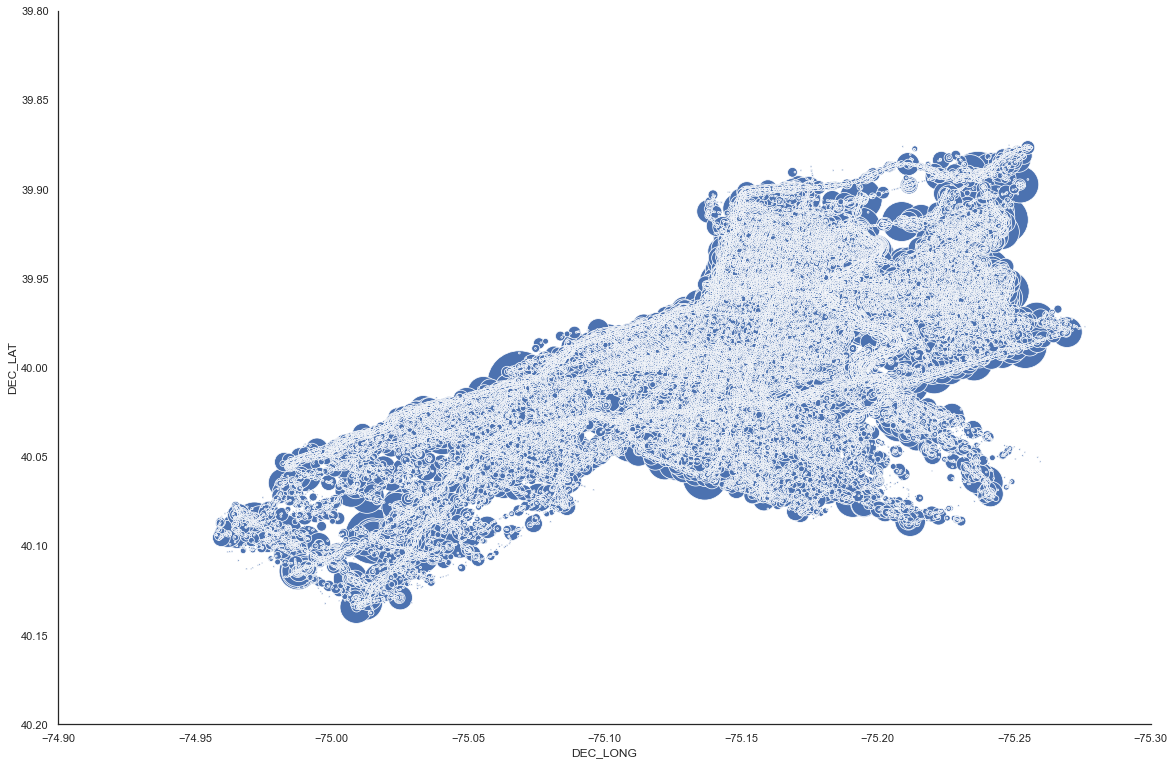

In [64]:
sns.set(style="white")
splot = sns.relplot(x="DEC_LONG", y="DEC_LAT", size="events", sizes=(3,4300), legend=None, data=groupLonLat)
splot.fig.set_size_inches(20, 12)
plt.ylim(40.2, 39.8)
plt.xlim(-74.9,-75.3)

In [65]:
crashData

,AUTOMOBILE_COUNT,COLLISION_TYPE,CRASH_MONTH,CRASH_YEAR,DAY_OF_WEEK,DEC_LAT,DEC_LONG,DISPATCH_TM,FATAL_COUNT,HOUR_OF_DAY,INJURY_COUNT,MAX_SEVERITY_LEVEL,TIME_OF_DAY,TOT_INJ_COUNT,TOTAL_UNITS,WEATHER1,DISTRICT,events
0,2,1,1,2010,7,39.9951,-75.2397,2225.0,0,22.0,0,0,2220.0,0,4,3,15.0,1
1,2,4,1,2010,6,39.9423,-75.1433,648.0,0,6.0,1,3,646.0,1,3,3,5.0,1
2,2,7,1,2010,2,39.9590,-75.1575,1203.0,0,11.0,0,0,1155.0,0,3,3,5.0,1
4,0,5,1,2010,6,39.9822,-75.2075,15.0,0,0.0,1,4,13.0,1,2,7,15.0,1
5,1,7,1,2010,6,39.9995,-75.0846,317.0,0,2.0,0,0,242.0,0,1,3,17.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10671,2,4,2,2008,5,40.0011,-75.1529,1630.0,0,16.0,1,8,1630.0,1,2,3,21.0,1
10672,1,4,1,2008,6,39.9693,-75.1432,2323.0,0,23.0,1,4,2300.0,1,2,3,19.0,1
10673,1,1,6,2008,2,39.9182,-75.2088,1638.0,0,99.0,0,0,9999.0,0,2,3,9.0,1
10674,2,4,3,2008,1,40.0086,-75.0688,1631.0,0,99.0,1,3,9999.0,1,2,3,11.0,1


In [ ]:
crashData_date_district = pv.groupby(by=['date', 'zip_code'])[["fine", "events"]].sum().reset_index()
pv_d_z['avg_fine'] = pv_d_z.fine / pv_d_z.events
pv_d_z

In [6]:
pv_d_z = pv.groupby(by=['date', 'zip_code'])[["fine", "events"]].sum().reset_index()
pv_d_z['avg_fine'] = pv_d_z.fine / pv_d_z.events
pv_d_z

,date,zip_code,fine,events,avg_fine
0,2012-01-01,19103.0,51.0,1,51.000000
1,2012-01-01,19104.0,82.0,2,41.000000
2,2012-01-01,19107.0,1014.0,14,72.428571
3,2012-01-01,19111.0,494.0,4,123.500000
4,2012-01-01,19114.0,51.0,1,51.000000
...,...,...,...,...,...
91156,2017-12-31,19125.0,612.0,12,51.000000
91157,2017-12-31,19130.0,609.0,14,43.500000
91158,2017-12-31,19145.0,52.0,2,26.000000
91159,2017-12-31,19147.0,3535.0,80,44.187500


In [7]:
pv['date'] = pd.to_datetime(pv['date'])
